# Chennai House Price Prediction

# Problem Statement


Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

# Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


let's start with importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

importing dataset

In [2]:
df=pd.read_csv('train-chennai-sale.csv',)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
## we will change the dtype of date sales and date build into date_time 
convert_dict = {'DATE_SALE': 'datetime64[ns]',
                'DATE_BUILD': 'datetime64[ns]'
                }
df=df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

for fill the null values we will find out which method is best 

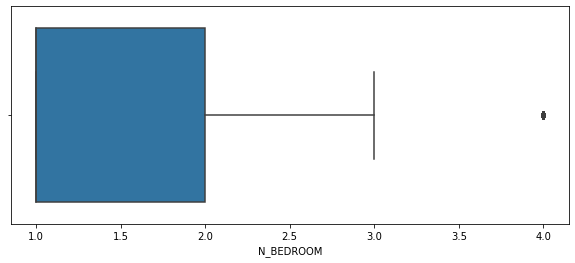

In [6]:
plt.figure(figsize=(10,4))
sns.boxplot(df.N_BEDROOM)
plt.show()

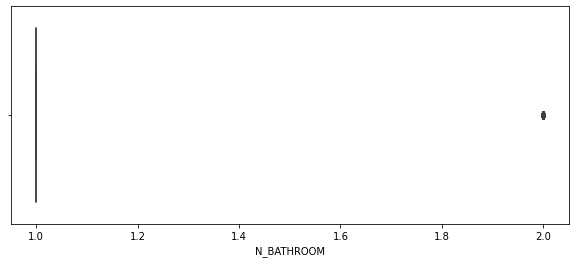

In [7]:
plt.figure(figsize=(10,4))
sns.boxplot(df.N_BATHROOM)
plt.show()

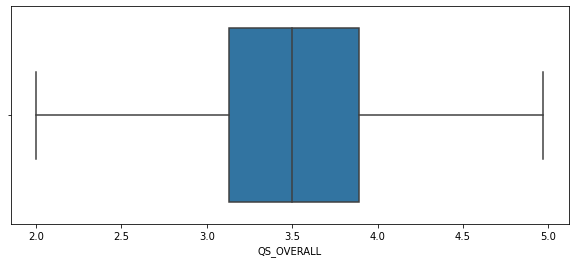

In [8]:
plt.figure(figsize=(10,4))
sns.boxplot(df.QS_OVERALL)
plt.show()

In [9]:
df['N_BEDROOM'].fillna(df.N_BEDROOM.mode()[0], inplace=True)
df['N_BATHROOM'].fillna(df.N_BATHROOM.mode()[0], inplace=True)
df['QS_OVERALL'].fillna(df.QS_OVERALL.mean(),inplace=True)

In [10]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

here we can see clear some  spelling mistake in AREA column so we will correct them  


In [12]:
df.replace({'AREA' : { 'Ana Nagar':'Anna Nagar', 'TNagar' :'T Nagar','Ann Nagar':'Anna Nagar','Chrmpet':'Chrompet','Karapakam':'Karapakkam','Chrompt':'Chrompet','Chormpet':'Chrompet','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar',}},inplace=True)

In [13]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

lets find out the sale price corresponding to area 

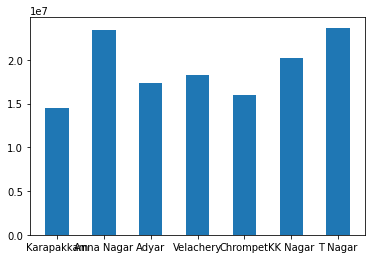

In [14]:
plt.bar(df.AREA,df.SALES_PRICE,width=0.5)
plt.show()

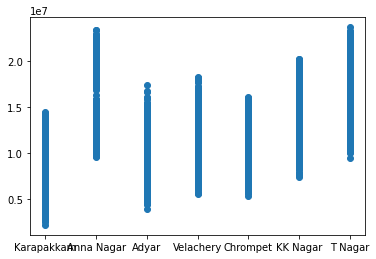

In [15]:
plt.scatter(x=df.AREA,y=df.SALES_PRICE)

In [16]:
df.replace({'AREA':{'Karapakkam':0,'Anna Nagar':6, 'Adyar':4, 'Velachery':2, 'Chrompet':1,
       'KK Nagar':3, 'T Nagar':5}},inplace=True)

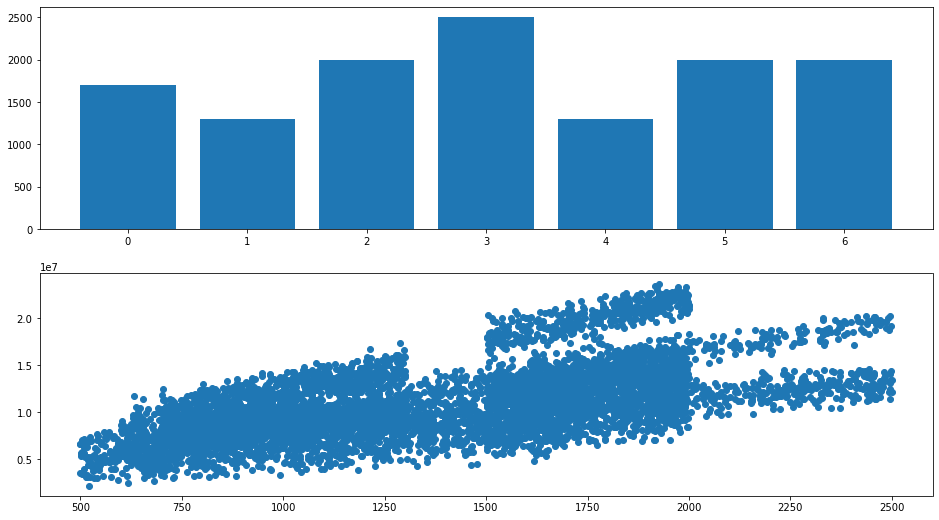

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.bar(df.AREA,df.INT_SQFT)

plt.subplot(2,1,2)
plt.scatter(df.INT_SQFT,df.SALES_PRICE)
plt.show()

bigger the area has high sales price but also depends on location('AREA')

In [18]:
## create the sold_after_days column which will show us after build  how many days it was sold out 
df['sold_after_days']= df['DATE_SALE']-df['DATE_BUILD'] 

In [19]:
df['sold_after_days']=df['sold_after_days'].astype(str)
df['sold_after_days']

0       16031 days
1        4015 days
2        7152 days
3        8030 days
4       10802 days
           ...    
7104    17942 days
7105     3196 days
7106    10455 days
7107    11443 days
7108    16060 days
Name: sold_after_days, Length: 7109, dtype: object

In [20]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sold_after_days
0,P03210,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031 days
1,P09411,6,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015 days
2,P01812,4,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152 days
3,P05346,2,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030 days
4,P06210,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802 days


In [21]:
df['sold_after_days']=df['sold_after_days'].str.split(' ').str.get(0)
df['sold_after_days']=df['sold_after_days'].astype(int)

we will create column where we will indicate the commission and registration fees in percentage of sales price


In [22]:
df['COMMISSION']=(df['COMMIS']/df['SALES_PRICE'])*100
df['registration']=(df['REG_FEE']/df['SALES_PRICE'])*100

In [23]:
##now we can drop the PRT_ID ,date_sale,build_date , COMMIS and REG_FEE columns

df.drop(['PRT_ID','DATE_SALE','DATE_BUILD','COMMIS','REG_FEE'],axis=1,inplace=True)

In [24]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,sold_after_days,COMMISSION,registration
0,0,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031,1.900000,5.000000
1,6,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015,1.400001,3.500000
2,4,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152,0.699997,3.199997
3,2,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030,0.799997,3.700003
4,0,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802,1.000007,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,17942,2.000000,3.900000
7105,2,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,3196,1.899999,3.199997
7106,2,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,10455,1.999998,3.800005
7107,0,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,11443,1.400000,5.000000


In [25]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

here also spelling mistakes in sale_cond column so we will correct them convert them into number

In [26]:
df.replace({'SALE_COND':{'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'}},inplace=True)

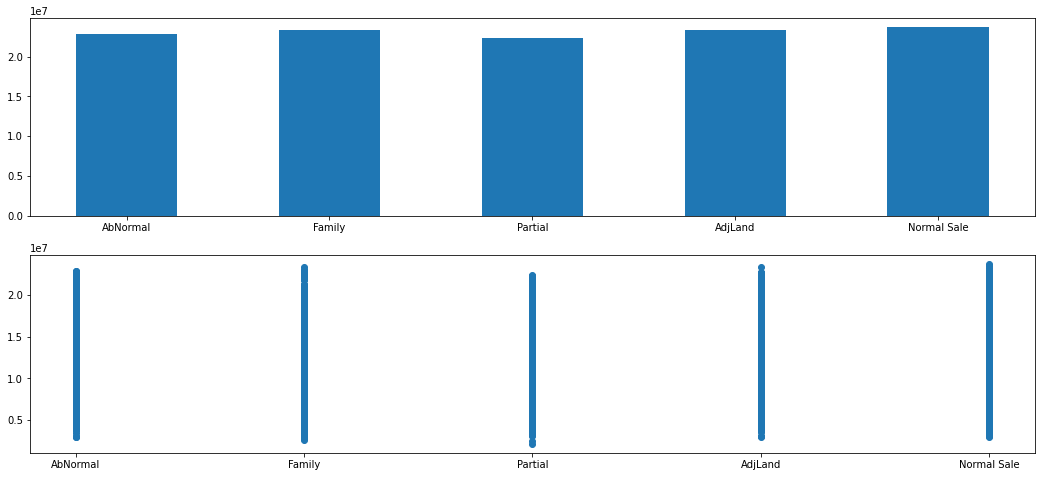

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.bar(df.SALE_COND,df.SALES_PRICE,width=0.5)

plt.subplot(2,1,2)
plt.scatter(df.SALE_COND,df.SALES_PRICE)
plt.show()

sALE_COND does not affect the sale_price

In [28]:
df.replace({'SALE_COND':{'AbNormal':1,'Family':2,'Partial':3,'AdjLand':4,'Normal Sale':5}},inplace=True)

In [29]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [30]:
df.replace({'PARK_FACIL':{'Noo':'No'}},inplace=True)
df.replace({'PARK_FACIL':{'Yes':1,'No':0}},inplace=True)

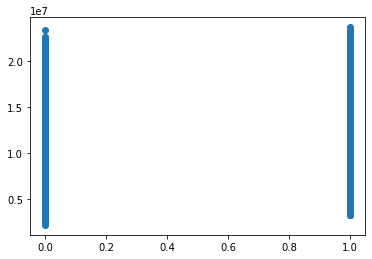

In [31]:
plt.scatter(df.PARK_FACIL,df.SALES_PRICE)
plt.show()

In [32]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [33]:
df.replace({'BUILDTYPE':{'Comercial':'Commercial','Others':'Other'}},inplace=True)
df.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

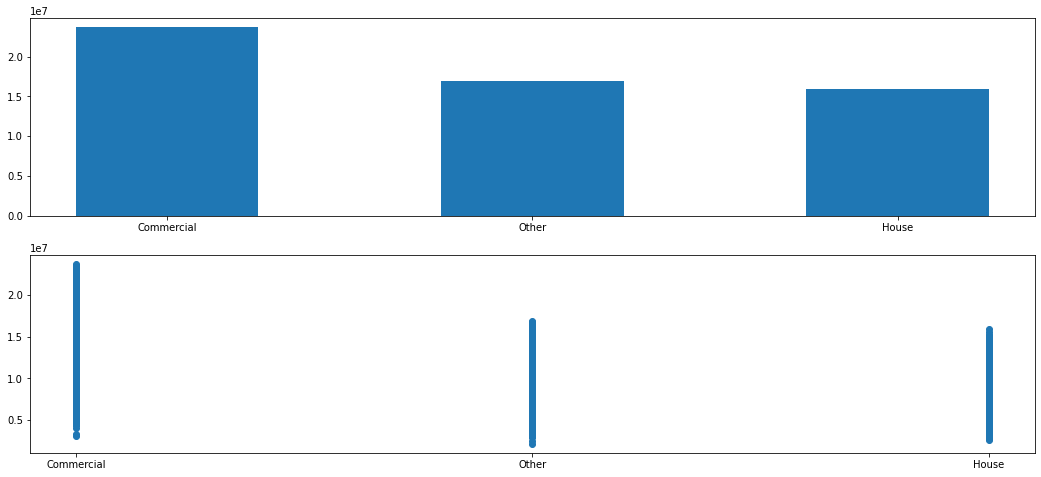

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.bar(df.BUILDTYPE,df.SALES_PRICE,width=0.5)

plt.subplot(2,1,2)
plt.scatter(df.BUILDTYPE,df.SALES_PRICE)
plt.show()

In [35]:
df.replace({'BUILDTYPE':{'Commercial':2, 'Other':1, 'House':0}},inplace=True)

In [36]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [37]:
df.replace({'UTILITY_AVAIL':{'All Pub':'AllPub','NoSewr ':'NoSeWa'}},inplace=True)

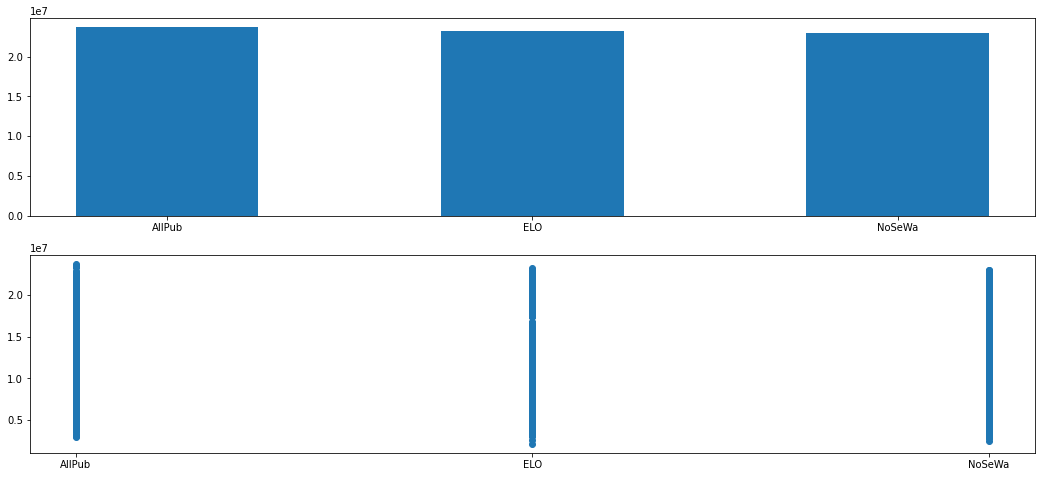

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.bar(df.UTILITY_AVAIL,df.SALES_PRICE,width=0.5)

plt.subplot(2,1,2)
plt.scatter(df.UTILITY_AVAIL,df.SALES_PRICE)
plt.show()

UTILITY_AVAIL does not affecting sales price

In [39]:
df.replace({'UTILITY_AVAIL':{'AllPub':1,'ELO':2,'NoSeWa':3}},inplace=True)

In [40]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [41]:
df.replace({'STREET':{'Pavd':'Paved','No Access':'NoAccess'}},inplace=True)

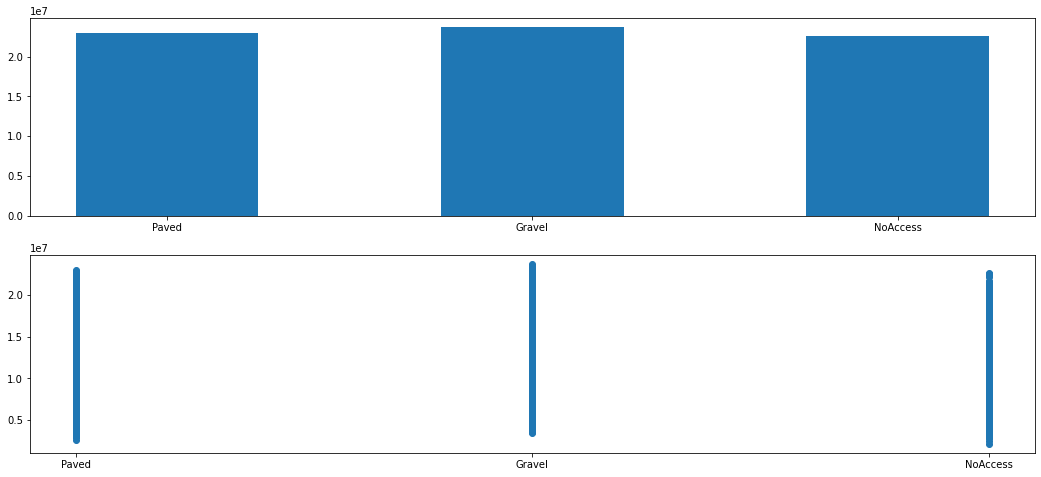

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.bar(df.STREET,df.SALES_PRICE,width=0.5)

plt.subplot(2,1,2)
plt.scatter(df.STREET,df.SALES_PRICE)
plt.show()

STREET type does not affecting sales price 

In [43]:
df.replace({'STREET':{'Paved':1,'Gravel':2,'NoAccess':3}},inplace=True)

In [44]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

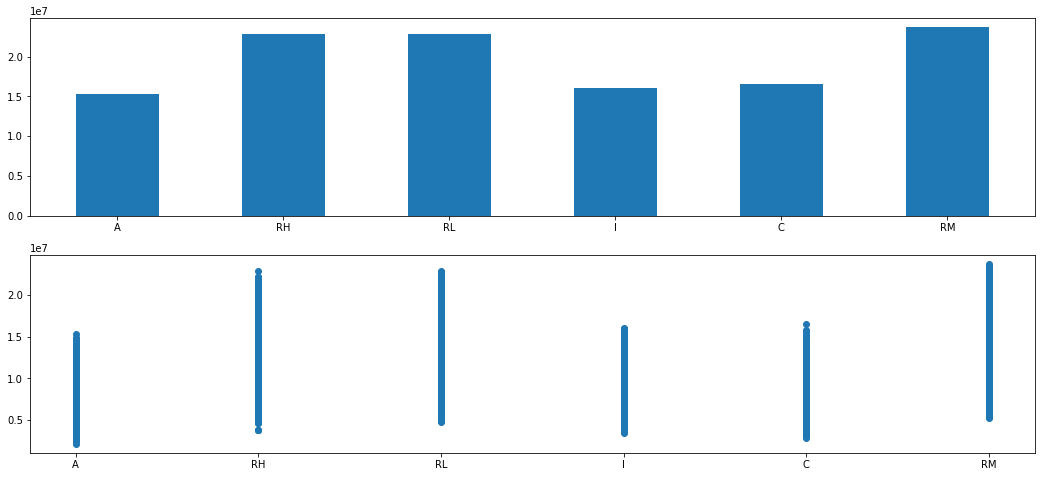

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.bar(df.MZZONE,df.SALES_PRICE,width=0.5)

plt.subplot(2,1,2)
plt.scatter(df.MZZONE,df.SALES_PRICE)
plt.show()

In [46]:
df.replace({'MZZONE':{'A':0, 'RH':4,'RL':3, 'I':1,'C':2,'RM':5}},inplace=True)

In [47]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,sold_after_days,COMMISSION,registration
0,0,1004,131,1.0,1.0,3,1,1,2,1,1,0,4.0,3.9,4.9,4.330,7600000,16031,1.900000,5.000000
1,6,1986,26,2.0,1.0,5,1,0,2,1,2,4,4.9,4.2,2.5,3.765,21717770,4015,1.400001,3.500000
2,4,909,70,1.0,1.0,3,1,1,2,2,2,3,4.1,3.8,2.2,3.090,13159200,7152,0.699997,3.199997
3,2,1855,14,3.0,2.0,5,2,0,1,3,1,1,4.7,3.9,3.6,4.010,9630290,8030,0.799997,3.700003
4,0,1226,84,1.0,1.0,3,1,1,1,1,2,2,3.0,2.5,4.1,3.290,7406250,10802,1.000007,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1.0,1.0,2,4,0,1,2,3,5,3.0,2.2,2.4,2.520,5353000,17942,2.000000,3.900000
7105,2,1897,52,3.0,2.0,5,2,1,1,3,3,4,3.6,4.5,3.3,3.920,10818480,3196,1.899999,3.199997
7106,2,1614,152,2.0,1.0,4,5,0,0,3,2,1,4.3,4.2,2.9,3.840,8351410,10455,1.999998,3.800005
7107,0,787,40,1.0,1.0,2,3,1,2,2,1,3,4.6,3.8,4.1,4.160,8507000,11443,1.400000,5.000000


spliting dataset 

In [48]:
x=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [49]:
x

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,sold_after_days,COMMISSION,registration
0,0,1004,131,1.0,1.0,3,1,1,2,1,1,0,4.0,3.9,4.9,4.330,16031,1.900000,5.000000
1,6,1986,26,2.0,1.0,5,1,0,2,1,2,4,4.9,4.2,2.5,3.765,4015,1.400001,3.500000
2,4,909,70,1.0,1.0,3,1,1,2,2,2,3,4.1,3.8,2.2,3.090,7152,0.699997,3.199997
3,2,1855,14,3.0,2.0,5,2,0,1,3,1,1,4.7,3.9,3.6,4.010,8030,0.799997,3.700003
4,0,1226,84,1.0,1.0,3,1,1,1,1,2,2,3.0,2.5,4.1,3.290,10802,1.000007,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1.0,1.0,2,4,0,1,2,3,5,3.0,2.2,2.4,2.520,17942,2.000000,3.900000
7105,2,1897,52,3.0,2.0,5,2,1,1,3,3,4,3.6,4.5,3.3,3.920,3196,1.899999,3.199997
7106,2,1614,152,2.0,1.0,4,5,0,0,3,2,1,4.3,4.2,2.9,3.840,10455,1.999998,3.800005
7107,0,787,40,1.0,1.0,2,3,1,2,2,1,3,4.6,3.8,4.1,4.160,11443,1.400000,5.000000


fitting linear regression model

In [50]:
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

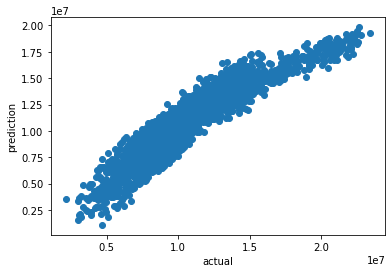

In [51]:
y_predict=le.predict(x_test)

plt.scatter(y_test,y_predict)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.show()

In [52]:
from sklearn.metrics import r2_score

metric_score=r2_score(y_test,y_predict,multioutput='uniform_average')
print('r2_score is',metric_score*100,'%')

r2_score is 86.26479589866649 %


# feature selection 
  
   Aim to maximize relevance and minimize redundancy.

In [53]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.93940184, 0.45153833, 0.28575705, 1.72873138, 2.30468516,
       1.23755658, 0.43967189, 0.37202871, 0.59355265, 1.13168257,
       0.48080242, 0.70612427, 0.14569168, 0.        , 0.19997926,
       0.        , 0.        , 0.13255147, 0.2548261 ])

In [54]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

N_BATHROOM         2.304685
N_BEDROOM          1.728731
N_ROOM             1.237557
UTILITY_AVAIL      1.131683
AREA               0.939402
MZZONE             0.706124
BUILDTYPE          0.593553
STREET             0.480802
INT_SQFT           0.451538
SALE_COND          0.439672
PARK_FACIL         0.372029
DIST_MAINROAD      0.285757
registration       0.254826
QS_BEDROOM         0.199979
QS_ROOMS           0.145692
COMMISSION         0.132551
QS_BATHROOM        0.000000
QS_OVERALL         0.000000
sold_after_days    0.000000
dtype: float64

<AxesSubplot:>

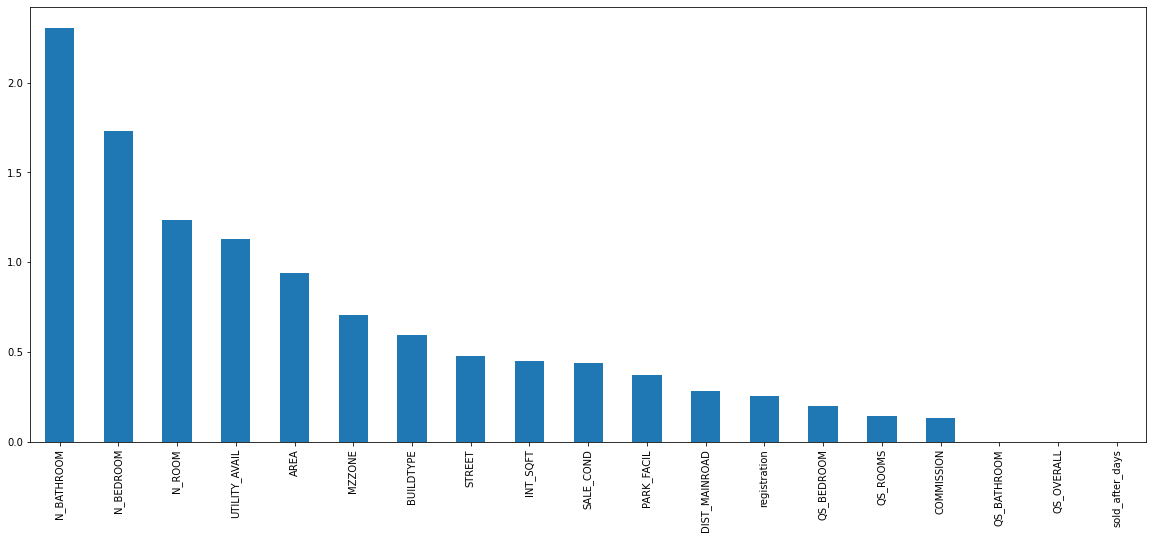

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

now we will find out best combination of features to predict the accurate price 

In [56]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
for i in range (1,11):
  f_selection=sfs(le,n_features_to_select=i)
  f_selection.fit(x,y)
  feature_selected=f_selection.get_feature_names_out()
  print(f'best {i}  features are {feature_selected}')
  xf=df.loc[ :,feature_selected]
  yf=df.loc[ :,'SALES_PRICE']
  xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,test_size=0.3)
  le.fit(xf_train,yf_train)
  yf_predict=le.predict(xf_test)
  print('r2 score :',r2_score(yf_test, yf_predict, multioutput='variance_weighted'))


best 1  features are ['INT_SQFT']
r2 score : 0.35343171117313443
best 2  features are ['INT_SQFT' 'BUILDTYPE']
r2 score : 0.6371688429365205
best 3  features are ['AREA' 'INT_SQFT' 'BUILDTYPE']
r2 score : 0.7464957840463451
best 4  features are ['AREA' 'INT_SQFT' 'BUILDTYPE' 'MZZONE']
r2 score : 0.8259071187670772
best 5  features are ['AREA' 'INT_SQFT' 'PARK_FACIL' 'BUILDTYPE' 'MZZONE']
r2 score : 0.8283781355982227
best 6  features are ['AREA' 'INT_SQFT' 'PARK_FACIL' 'BUILDTYPE' 'MZZONE' 'registration']
r2 score : 0.8378265179974652
best 7  features are ['AREA' 'INT_SQFT' 'PARK_FACIL' 'BUILDTYPE' 'MZZONE' 'sold_after_days'
 'registration']
r2 score : 0.8543435916592661
best 8  features are ['AREA' 'INT_SQFT' 'N_BEDROOM' 'PARK_FACIL' 'BUILDTYPE' 'MZZONE'
 'sold_after_days' 'registration']
r2 score : 0.8575785445878353
best 9  features are ['AREA' 'INT_SQFT' 'N_BEDROOM' 'N_ROOM' 'PARK_FACIL' 'BUILDTYPE' 'MZZONE'
 'sold_after_days' 'registration']
r2 score : 0.8580640420839464
best 10  

best 10  features are ['AREA' 'INT_SQFT' 'N_BEDROOM' 'N_ROOM' 'PARK_FACIL' 'BUILDTYPE' 'STREET'
 'MZZONE' 'sold_after_days' 'registration']

so we will use only those 10 feature for our final model

In [57]:
x_feature=df[['AREA','INT_SQFT','N_BEDROOM','N_ROOM','PARK_FACIL','BUILDTYPE','STREET','MZZONE','sold_after_days','registration']]

y_target=df['SALES_PRICE']

In [58]:
##splitting data into train and test

x1_train,x1_test,y1_train,y1_test=train_test_split(x_feature,y_target,test_size=0.3)

In [59]:
##fitting model 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model=RandomForestRegressor()

model.fit(x1_train,y1_train)

RandomForestRegressor()

In [60]:
## predicting the model 

y1_predict=model.predict(x1_test)
y1_predict

array([10390313.05,  9062322.3 , 10948367.6 , ..., 12715403.4 ,
       11599165.  , 19683994.4 ])

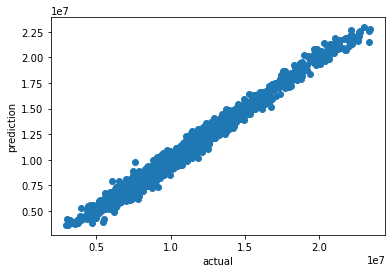

In [61]:
plt.scatter(y1_test,y1_predict)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.show()

In [62]:
# calculate the prediction intervals
prediction_intervals = []
for i in range(len(y1_predict)):
    alpha = 0.95
    n = len(y1_test)
    y1_pred_i = y1_predict[i]
    y1_test_i = y1_test.values[i]
    sigma = np.sqrt(mean_squared_error(y1_test, y1_predict))
    t = 1.96  # t-value for 95% confidence interval with n-1 degrees of freedom
    prediction_interval = (y1_pred_i - t * sigma / np.sqrt(n), y1_pred_i + t * sigma / np.sqrt(n))
    prediction_intervals.append(prediction_interval)

# print the prediction intervals
print(prediction_intervals) 

[(10370103.605375241, 10410522.49462476), (9042112.855375241, 9082531.74462476), (10928158.15537524, 10968577.044624759), (21258184.55537524, 21298603.44462476), (10519160.75537524, 10559579.644624759), (13599221.55537524, 13639640.44462476), (11898272.15537524, 11938691.044624759), (7918898.05537524, 7959316.94462476), (10688745.55537524, 10729164.44462476), (7551557.655375239, 7591976.54462476), (21505256.655375242, 21545675.54462476), (7845933.80537524, 7886352.69462476), (9974626.955375241, 10015045.84462476), (12320323.65537524, 12360742.544624759), (8654179.80537524, 8694598.69462476), (8602488.855375241, 8642907.74462476), (9113308.855375241, 9153727.74462476), (7242554.655375239, 7282973.54462476), (13205809.15537524, 13246228.044624759), (5616050.55537524, 5656469.44462476), (10580944.355375241, 10621363.24462476), (8248761.95537524, 8289180.844624761), (18129000.75537524, 18169419.64462476), (20494146.75537524, 20534565.64462476), (22074670.95537524, 22115089.844624758), (947

In [63]:
# Make a prediction using the model
new_features =np.array([[5,1400,4,4,1,2,3,1,16000,5]])
prediction = model.predict(new_features)

sigma = np.sqrt(mean_squared_error(y1_test, y1_predict))
t = 1.96        # t-value for 95% confidence interval with n-1 degrees of freedom
prediction_interval = (prediction - t * sigma / 1, prediction + t * sigma /1)


print("Prediction house price:", prediction)
print('Prediction range of  house price:',prediction_interval)

Prediction house price: [16436393.2]
Prediction range of  house price: (array([15503031.86385843]), array([17369754.53614157]))


In [64]:
## lets put our own data to predict the house price
data=[]
for i in range(1,11):
    if i==1:
        print("Give a input for 'AREA'\nfor AREA\n'Karapakkam':0,'Anna Nagar':6, 'Adyar':4, 'Velachery':2, 'Chrompet':1,'KK Nagar':3, 'T Nagar':5 ")
    if i==2:
        print("Give a input for 'INT_SQFT'\nfor'INT_SQFT' input range between 500-2500 ")
    if i==3:
        print("Give a input for 'N_BEDROOM'\nfor 'N_BEDROOM' no.s of bedroom")
    if i==4:
        print("Give a input for 'N_ROOM'\nfor'N_ROOM' no.s of total rooms")
    if i==5:
        print("Give a input for 'PARK_FACIL'\nfor 'PARK_FACIL'\nYes=1\nN0=0")
    if i==6:
        print("Give a input for 'BUILDTYPE'\nfor 'BUILDTYPE'\n'Commercial':2, 'Other':1, 'House':0")
    if i==7:
        print("Give a input for 'STREET'\nfor 'STREET'type\n'Paved':1,'Gravel':2,'NoAccess':3")
    if i==8:
        print("Give a input for 'MZZONE'\nfor 'MZZONE'\n'A':0, 'RH':4,'RL':3, 'I':1,'C':2,'RM':5")
    if i==9:
        print("Give a input for 'sold_after_days'\nfor 'sold_after_days'feature put numbers in range 365 to 20000")
    if i==10:
        print("Give a input for 'registration'\n for 'registration' percentage select range from 1 to 10 ")
    print(input(f'feature {i}:'))
    i=i+1
    data.append(i)
    
# Make a prediction using the model
new_features =np.array([data])
prediction = model.predict(new_features)

sigma = np.sqrt(mean_squared_error(y1_test, y1_predict))
t = 1.96        
minimum_range = (prediction - t * sigma / 1)
maximum_range = (prediction + t * sigma /1)


print("Prediction house price:", prediction)
print(f'Prediction range of house price is {minimum_range} to {maximum_range}')
    

Give a input for 'AREA'
for AREA
'Karapakkam':0,'Anna Nagar':6, 'Adyar':4, 'Velachery':2, 'Chrompet':1,'KK Nagar':3, 'T Nagar':5 
feature 1:0
0
Give a input for 'INT_SQFT'
for'INT_SQFT' input range between 500-2500 
feature 2:2000
2000
Give a input for 'N_BEDROOM'
for 'N_BEDROOM' no.s of bedroom
feature 3:2
2
Give a input for 'N_ROOM'
for'N_ROOM' no.s of total rooms
feature 4:4
4
Give a input for 'PARK_FACIL'
for 'PARK_FACIL'
Yes=1
N0=0
feature 5:1
1
Give a input for 'BUILDTYPE'
for 'BUILDTYPE'
'Commercial':2, 'Other':1, 'House':0
feature 6:2
2
Give a input for 'STREET'
for 'STREET'type
'Paved':1,'Gravel':2,'NoAccess':3
feature 7:1
1
Give a input for 'MZZONE'
for 'MZZONE'
'A':0, 'RH':4,'RL':3, 'I':1,'C':2,'RM':5
feature 8:0
0
Give a input for 'sold_after_days'
for 'sold_after_days'feature put numbers in range 365 to 20000
feature 9:900
900
Give a input for 'registration'
 for 'registration' percentage select range from 1 to 10 
feature 10:1
1
Prediction house price: [11225307.4]
Predic